In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style ## GRAFICOS 
import seaborn as sns # MANEJO ESTADISTICO MAPA DE CALOR 
import pandas as pd ## MANEJO DE BASES DE DATOS EN DATAFRAMES
import numpy as np ## SIMULACIONES DISCRETAS


import math
import matplotlib.pyplot as plt
import unicodedata
import random
from scipy.stats import uniform,rice

In [ ]:
df=pd.DataFrame({"columna1":[1,2,3,4],"columna2":["a","b","c","d"]})

In [ ]:
df

,columna1,columna2
0,1,a
1,2,b
2,3,c
3,4,d


In [ ]:
df.shape ##[FILAS,COLUMNAS]

(4, 2)

In [ ]:
df.describe()

,columna1
count,4.000000
mean,2.500000
std,1.290994
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
#df=pd.read_csv("pacientes_vacunados.csv") 
error=None
df=None
try:
      datos=pd.read_csv("pacientes_vacunados.csv")
      df=pd.DataFrame(datos)
      print("ARCHIVO LEIDO".center(50,"="))
except Exception as e:
      print("Error".center(40,"="))
      print(f"Ha ocurrido un error al cargar el archivo:{e}")
      error=True
finally:
      if error==True:
        print(error)

==================ARCHIVO LEIDO===================


In [ ]:
df

,COD_VACUNADO,DEPARTAMENTO,GENERO,RANGO_EDAD,EDAD
0,100001,Amazonas,M,Rango 4,34
1,100002,Antioquia,F,Rango 5,45
2,100003,Arauca,M,Rango 6,54
3,100004,Atlántico,M,Rango 2,10
4,100005,Bogotá,F,Rango 2,11
...,...,...,...,...,...
281,100282,Quindío,F,Rango 7,65
282,100283,Risaralda,F,Rango 1,6
283,100284,San Andrés y Providencia,F,Rango 2,11
284,100285,Santander,F,Rango 6,57


In [ ]:
#PARA ACCEDER A UN ELEMENTO DETERMINADO DE UNA BASE DE DATOS 
GENEROS=df["DEPARTAMENTO"]
GENEROS

0                      Amazonas
1                     Antioquia
2                        Arauca
3                     Atlántico
4                        Bogotá
                 ...           
281                     Quindío
282                   Risaralda
283    San Andrés y Providencia
284                   Santander
285                       Sucre
Name: DEPARTAMENTO, Length: 286, dtype: object

In [ ]:
print(type(GENEROS))

<class 'pandas.core.series.Series'>


In [ ]:
GENEROS_DF=pd.DataFrame(GENEROS)
GENEROS_DF

,DEPARTAMENTO
0,Amazonas
1,Antioquia
2,Arauca
3,Atlántico
4,Bogotá
...,...
281,Quindío
282,Risaralda
283,San Andrés y Providencia
284,Santander


In [ ]:
#contar la frecuencia de cada departmento, usando value_counts de pandas. Se crea una lista de frecuencias de departamentos:
frec =  pd.value_counts(df["DEPARTAMENTO"]) ## CON EL COMANDO COUNT LO QUE HAGO ES CONTAR LOS DATOS Y ASOCIARLES UNA FRECUENCIA DE APARICION
    #con la lista de frecuencias de deparatamentos se crea un dataframe:
frec_df = pd.DataFrame(frec)
frec_df

,DEPARTAMENTO
Quindío,21
Risaralda,15
Putumayo,15
Norte de Santander,15
Nariño,15
Meta,15
Sucre,14
Vaupés,12
Valle del Cauca,12
Tolima,12


In [ ]:

frec_df.mean()

DEPARTAMENTO    8.666667
dtype: float64

In [ ]:
frec_df.median()

DEPARTAMENTO    9.0
dtype: float64

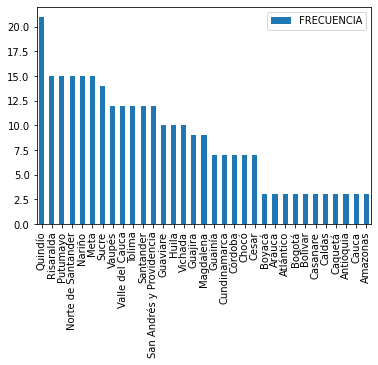

In [ ]:
##GRAFICAR:

frec_df.columns = ["FRECUENCIA"] ##definimos el nombre de la columna graficar
frec_df.plot(kind="bar",legend="Reverse") ## EN KIND SE DEFINE EL TIPO DE GRAFICA
plt.xlabel=("Departamentos")
plt.show()

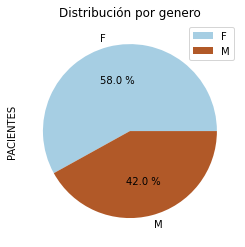

In [ ]:
frec = pd.value_counts(df["GENERO"])
frec_df = pd.DataFrame(frec)
    #TODO: pintar la gráfica de pie:
frec_df.columns = ["PACIENTES"]
frec_df.plot(kind="pie",cmap='Paired',subplots=True,autopct="%0.1f %%")
plt.title("Distribución por genero")

plt.show()

In [ ]:
###  OTROS METODOS IMPORTANTES:
## CREAMOS UN NUEVO DATAFRAME 
df_single_level_cols = pd.DataFrame([[0, 1], [2, 3]],
                                    index=['cat', 'dog'],
                                    columns=['weight', 'height'])
df_single_level_cols

,weight,height
cat,0,1
dog,2,3


In [ ]:
##AGREGAR ELEMENTO
df_single_level_cols["Colour"]=["white","black"]
df_single_level_cols

,weight,height,Colour
cat,0,1,white
dog,2,3,black


In [ ]:
##ELIMINAR ELEMENTO
df_single_level_cols=df_single_level_cols.drop(columns="Colour")
df_single_level_cols

,weight,height
cat,0,1
dog,2,3


In [ ]:
######COMANDO STACK()
df_single_level_cols.stack()

cat  weight    0
     height    1
dog  weight    2
     height    3
dtype: int64

In [ ]:
df_single_level_cols.stack().reset_index()

,level_0,level_1,0
0,cat,weight,0
1,cat,height,1
2,dog,weight,2
3,dog,height,3


**ENTROPIA/ ARCHIVOS DE TEXTO**

In [ ]:
def EntropyText(Arreglo_Texto,PrintCaracters=False,ProbaMarginal=True,PrintEntropy=True):

  char, cnt = np.unique(Arreglo_Texto, return_counts=True) ## Obtenemos la Cantidad de letras y sus apariciones respectivas 
  
  p = cnt/np.sum(cnt) ## HALLAMOS LA PROBABILIDAD MARGINAL DE CADA ELEMENTO
  if(PrintCaracters):
   print('Caracteres:',char) ## IMPRIMIMOS LA LISTA CON LAS LETRAS
  if (ProbaMarginal):

   plt.stem(char,p, 'b') ## GRAFICAMOS CADA LETRA CON SU CORRESPONDIENTE PROBABILIDAD MARGINAL
   plt.ylabel('P(x_n)')
   plt.show()
  H = -np.sum(p * np.log2(p)) ## CALCULAMOS SU ENTROPIA UTILIZANDO B=2 ES DECIR BINARIO
  if(PrintEntropy):
   print("==========ENTROPIA=========")
   print("                           ")
   print('Entropy:{}'.format(H)) 

  return H,char,cnt

"""
Input
-----------------
Arreglo_Texto(List-Array): Lista o Arreglo que contiene todas las componentes del texto 
PrintCaracters(Boole): Variable booleana que determina si se desea imprimir los componentes reconocidos en el texto
ProbaMarginal(Boole): Variable booleana que determina si se desea obtener el grafico de la probabilidad marginal de cada elemento

Return
------------------

H=Entropia (float)
char= Caracter (list)
cnt= Contadores de cada Caracter (List)
"""

'\nInput\n-----------------\nArreglo_Texto(List-Array): Lista o Arreglo que contiene todas las componentes del texto \nPrintCaracters(Boole): Variable booleana que determina si se desea imprimir los componentes reconocidos en el texto\nProbaMarginal(Boole): Variable booleana que determina si se desea obtener el grafico de la probabilidad marginal de cada elemento\n\nReturn\n------------------\n\nH=Entropia (float)\nchar= Caracter (list)\ncnt= Contadores de cada Caracter (List)\n'

In [ ]:
### LEEMOS UN ARCHIVO DE TEXTO

nombreArchivo="EnglishRead.txt"

with open(nombreArchivo) as f:
    text = f.read()##LEEMOS EL ARCHIVO
    text = unicodedata.normalize("NFKD", text)
    a = np.array(list(text))#PASAMOS EL ARCHIVO A UN ARREGLO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


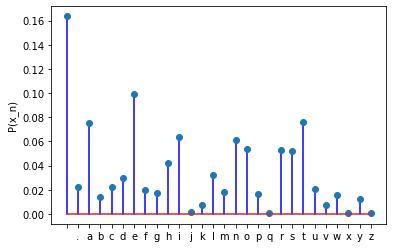

==========ENTROPIA=========
                           
Entropy:4.178084676264878


In [ ]:
##CALCULAMOS LA PROBABILIDAD MARGINAL DE CADA ELEMENTO DEL TEXTO Y ENTROPIA DEL TEXTO:
Entropia,char,cnt=EntropyText(a)

**MAPA DE CALOR**

In [ ]:
##FUNCION QUE ENTREGA EL MAPA DE CALOR DE LA MATRIZ DE PROBABILIDADES CONJUNTA:

def MapProbConditional(char):
  Lista_Posiciones_Aparicion=[]#Lista Para Guardar las apariciones de cada caracter de forma booleana analizando todo el texto
  ## 1 si aparece y 0 si no,analizando cada posicion del texto 
  i=0
  for Caracter_buscado in char:
    if i<len(char):
      Lista_Posiciones_Aparicion.append([int(Caracter_texto==Caracter_buscado) for Caracter_texto in text])
      i+=1
  MATRIZ_PROBABILIDADES_CONDICIONALES=[] 
  LISTA_PROBABILIDADES_CONDICIONALES=[]
  ##LAS VARIABLES A Y B DETERMINAN LOS CARACTERES QUE QUIERO ANALIZAR DE LA LISTA DE CARACTERES
  for A in range (0,len(Lista_Posiciones_Aparicion)):
   for B in range(0,len(Lista_Posiciones_Aparicion)):
        his,_,_=np.histogram2d(Lista_Posiciones_Aparicion[A],Lista_Posiciones_Aparicion[B],density=1)
        his=his/his.sum()
        k=his/his.sum(axis=0) # PROBABILIDAD CONDICIONAL
        if A==B:
          LISTA_PROBABILIDADES_CONDICIONALES.append(k[len(k)-1][len(k[0])-1]) 
        else:
          LISTA_PROBABILIDADES_CONDICIONALES.append(k[len(k)-1][0])
   MATRIZ_PROBABILIDADES_CONDICIONALES.append(LISTA_PROBABILIDADES_CONDICIONALES.copy())
   LISTA_PROBABILIDADES_CONDICIONALES.clear()

   ##GENERAMOS EL MAPA DE CALOR:
  plt.figure(figsize=(14,14))
  sns.heatmap(MATRIZ_PROBABILIDADES_CONDICIONALES,xticklabels=char,yticklabels=char,annot=True,linewidths=0.5) 
  plt.tight_layout()
  plt.show()
   
"""
input
-----------------
char(list): Lista de los caracteres del texto

Return
------------------
Null
"""

'\ninput\n-----------------\nchar(list): Lista de los caracteres del texto\n\nReturn\n------------------\nNull\n'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


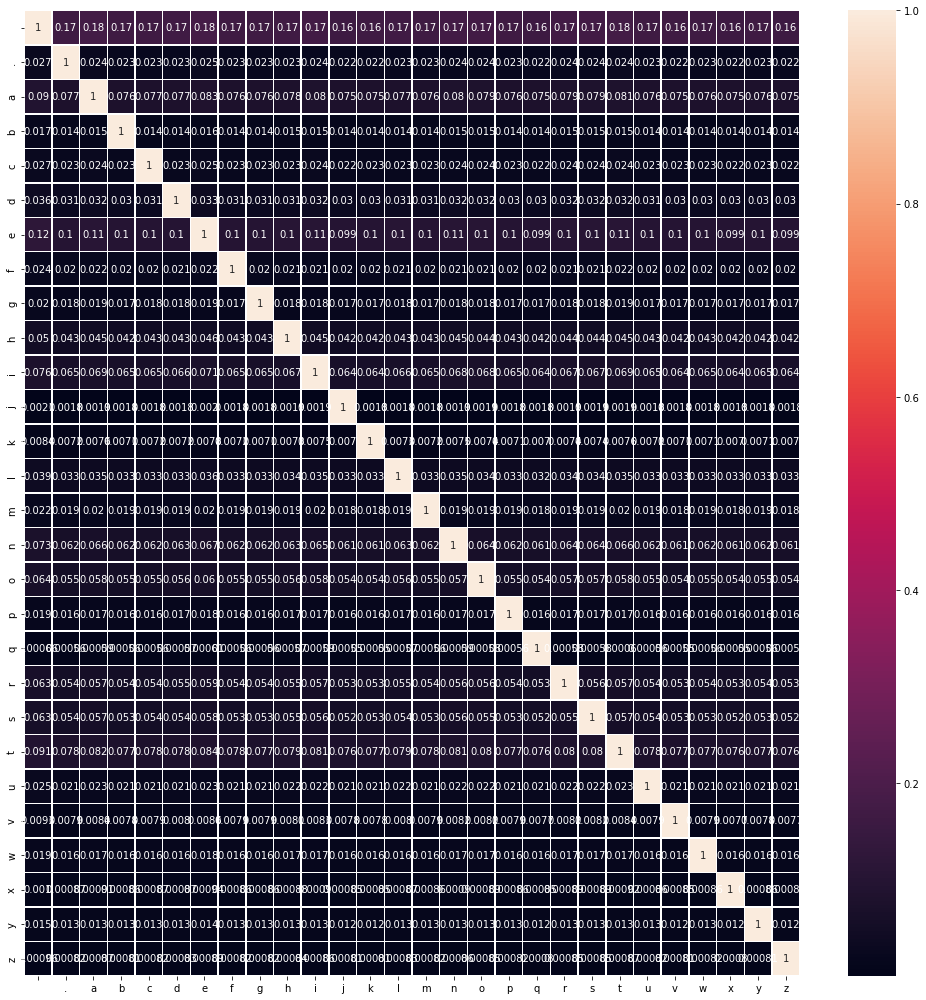

In [ ]:
MapProbConditional(char) ##MAPA DE CALOR DE PROBABILIDADES CONDICIONALES

**SEABORN PAIRPLOT**

In [ ]:
#df=pd.read_csv("pacientes_vacunados.csv") 
error=None
df=None
try:
      datos=pd.read_csv("pacientes_vacunados.csv")
      df=pd.DataFrame(datos)
      print("ARCHIVO LEIDO".center(50,"="))
except Exception as e:
      print("Error".center(40,"="))
      print(f"Ha ocurrido un error al cargar el archivo:{e}")
      error=True
finally:
      if error==True:
        print(error)

==================ARCHIVO LEIDO===================


In [ ]:
df

,COD_VACUNADO,DEPARTAMENTO,GENERO,RANGO_EDAD,EDAD
0,100001,Amazonas,M,Rango 4,34
1,100002,Antioquia,F,Rango 5,45
2,100003,Arauca,M,Rango 6,54
3,100004,Atlántico,M,Rango 2,10
4,100005,Bogotá,F,Rango 2,11
...,...,...,...,...,...
281,100282,Quindío,F,Rango 7,65
282,100283,Risaralda,F,Rango 1,6
283,100284,San Andrés y Providencia,F,Rango 2,11
284,100285,Santander,F,Rango 6,57


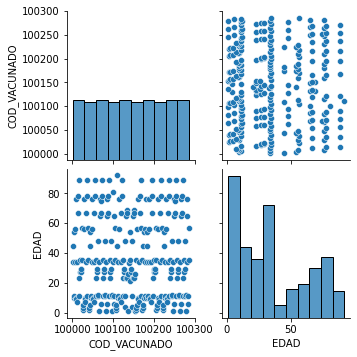

In [ ]:
sns.pairplot(df)

In [ ]:
df.dtypes

COD_VACUNADO     int64
DEPARTAMENTO    object
GENERO          object
RANGO_EDAD      object
EDAD             int64
dtype: object